In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
def EI(x):
    exponent = 5 * np.sin((x**2) / np.pi)
    exponent = np.where(exponent >= 0, exponent, 0)
    return np.sin(x) * (np.sin((x**2) / np.pi))**exponent

In [13]:
class Particle:
    def __init__(self, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds[:, 2], bounds[:, 3], bounds[:, 4], bounds[:, 5], bounds[:, 6], bounds[:, 7], bounds[:, 8])
        self.velocity = np.random.uniform(0, 1, size=(bounds.shape[0],))
        self.best_position = np.copy(self.position)
        self.best_score = damavandi(self.position)

In [14]:
class PSO:
    def __init__(self, n_particles, bounds, iterations, c1=2.05, c2=2.05):
        self.n_particles = n_particles
        self.bounds = bounds
        self.iterations = iterations
        self.c1 = c1
        self.c2 = c2
        self.particles = [Particle(bounds) for _ in range(n_particles)]
        self.gbest_score = np.inf
        self.gbest_position = np.zeros(bounds.shape[0])
        self.w = np.linspace(0.9, 0.1, self.iterations)
        self.best_scores = []
        self.positions_over_time = []

    def optimize(self):
        for i in range(self.iterations):
            positions = []
            for particle in self.particles:
                fitness = damavandi(particle.position)

                if np.all(fitness < particle.best_score):
                    particle.best_score = fitness
                    particle.best_position = np.copy(particle.position)


                if np.any(fitness < self.gbest_score):
                    self.gbest_score = fitness
                    self.gbest_position = np.copy(particle.position)


                r1 = np.random.random()
                r2 = np.random.random()

                cognitive = self.c1 * r1 * (particle.best_position - particle.position)
                social = self.c2 * r2 * (self.gbest_position - particle.position)

                particle.velocity = self.w[i] * particle.velocity + cognitive + social
                particle.position += particle.velocity

                particle.position = np.clip(particle.position, self.bounds[:, 0], self.bounds[:, 1])
                positions.append(particle.position)

            self.positions_over_time.append(positions)
            self.best_scores.append(self.gbest_score)

        return self.gbest_position, self.gbest_score

    def animate(self):
        fig, ax = plt.subplots()

        dim1, dim2 = np.random.choice(range(self.bounds.shape[0]), size=2, replace=False)

        def update(num):
            ax.clear()
            ax.set_title('Iteration ' + str(num))
            ax.set_xlim([self.bounds[dim1, 0], self.bounds[dim1, 1]])
            ax.set_ylim([self.bounds[dim2, 0], self.bounds[dim2, 1]])
            positions = self.positions_over_time[num]
            for position in positions:
                ax.scatter(position[dim1], position[dim2])

        ani = animation.FuncAnimation(fig, update, frames=self.iterations, repeat=False)
        writervideo = animation.FFMpegWriter(fps=2)
        ani.save('./pso.mp4', writer=writervideo)
        plt.show()

In [15]:
def main():
    bounds = np.array([[16., 32.], [1., 3.], [16., 32.],[1., 3.], [32., 64.], [16., 32.],[1., 9.], [0.0001, 0.01], [32., 128.]])
    pso = PSO(n_particles=30, bounds=bounds, iterations=30)
    best_position, best_score = pso.optimize()
    print(f"Best position: {best_position}, Best score: {best_score}")
    pso.animate()

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
Best position: [-2.2299433   4.78056702  4.13164074], Best score: [-0.79022823 -0.47341129 -0.83605236]


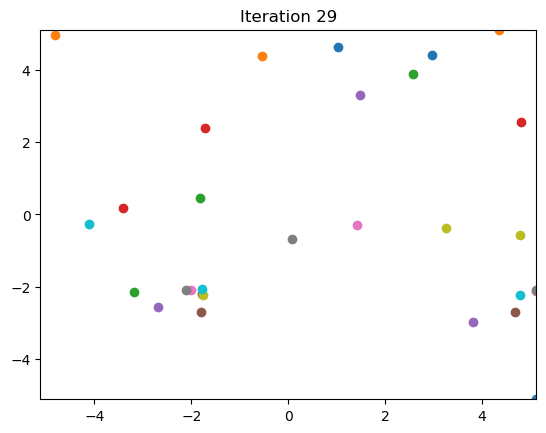

In [16]:
main()